# Flicker Generator

Se cargan tres librerías básicas
* os, para el manejo de los archivos entre carpetas, camnbios en las rutas etc...
* numpy y sicpy, para las funciones internas que se necesiten. Scipy en cuestión es para poder manejar achivos .mat.

In [1]:
import os
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

En este script, solo tenemos una sola función "swell_generator".
- Primero hacemos una iteración de todos los archivos de la carpeta que se generó en el script "Signal_Extractor.ipynb".
- Si la ruta es correcta, debería encontrae el archivo, una vez que se encuentra el archivo, para operar se manera más sencilla, se trabajan con señales normalizadas. En este caso se usará la normalizada por el RMS.
- Después simplemente se define el factor de amplitud de la señal, como es un swell, tendrá que ser mayor que la señal nominal en un período de tiempo, los valores están definidos en la norma IEEE 1159.


- ![](https://figures.semanticscholar.org/308ec64d75779240f7fcdcdb8a7787098c605edd/1-TableI-1.png)


- Se elimina el print del final para no generar los 3600 datos en pantalla.
- Respecto a los límites, para poder trabajar dentro de la normal, tenemos que tener un rango de amplificación de entre 0.5 ciclos (0.01 segundo o 100 muestras) a 30 ciclos (0.6 s o 6000 muestras) y los factores de amplitud son de 0.1 a 0.7% (0.007 x Amplitud).

In [2]:
# Obtener el directorio actual del script
# directorio_actual = os.path.abspath(os.path.dirname(__file__)) Funcionaba cuando era un archivo '.py'
directorio_actual = os.path.dirname(os.path.abspath('disturbance_creator'))
directorio_destino = os.path.join(directorio_actual, 'flicker_signals')

# Creamos todas las carpetas antes de iniciar el bucle.

os.makedirs(directorio_destino, exist_ok=True)
os.makedirs(os.path.join('flicker_signals', 'test'), exist_ok=True)
os.makedirs(os.path.join('flicker_signals', 'train'), exist_ok=True)
os.makedirs(os.path.join('flicker_signals', 'val'), exist_ok=True)

def flicker_generator():
    for i in range(3601):
        nombre_archivo = f"or_s_{i}.npy"
        ruta_archivo = os.path.join(directorio_actual, 'original_signal', nombre_archivo)

        if os.path.exists(ruta_archivo):
            # print(f"Se encontró el archivo {nombre_archivo}")
            # Cargar los datos desde el archivo .npy
            data = np.load(ruta_archivo)
            # Normalizar la señal al rango [-1, 1]
            signal_original = data / np.max(np.abs(data))

            # Parámetros del flicker
            frecuencia_flicker = 1  # Frecuencia del flicker en Hz (puedes variar entre 0.5 y 30 Hz)
            tasa_muestreo = 10000  # Tasa de muestreo en Hz
            tiempo = np.arange(len(signal_original)) / tasa_muestreo

            # Generar la señal sinusoidal para el flicker
            amplitud_moduladora = 0.2  # Variación de amplitud (20% en este caso)
            flicker = 1 + amplitud_moduladora * np.sin(2 * np.pi * frecuencia_flicker * tiempo)

            # Aplicar el flicker a la señal original
            signal_flicker = signal_original * flicker

            # Guardar la señal amplificada en un nuevo archivo    
            
            if i < 2521:
                directorio_destino_final = os.path.join(directorio_destino, 'train')
            elif i < 3061:
                directorio_destino_final = os.path.join(directorio_destino, 'test')
            elif i < 3601:
                directorio_destino_final = os.path.join(directorio_destino, 'val')
            else:
                print(f"No se encontró el archivo {nombre_archivo}")
            
            
            nombre_archivo_nuevo = f"flk_s_{i}.npy"
            ruta_archivo_nuevo = os.path.join(directorio_destino_final, nombre_archivo_nuevo)
            np.save(ruta_archivo_nuevo, signal_flicker)
            #print(f"Señal amplificada guardada en {nombre_archivo_nuevo}")
        #else:
            #print(f"No se encontró el archivo {nombre_archivo}")

flicker_generator()


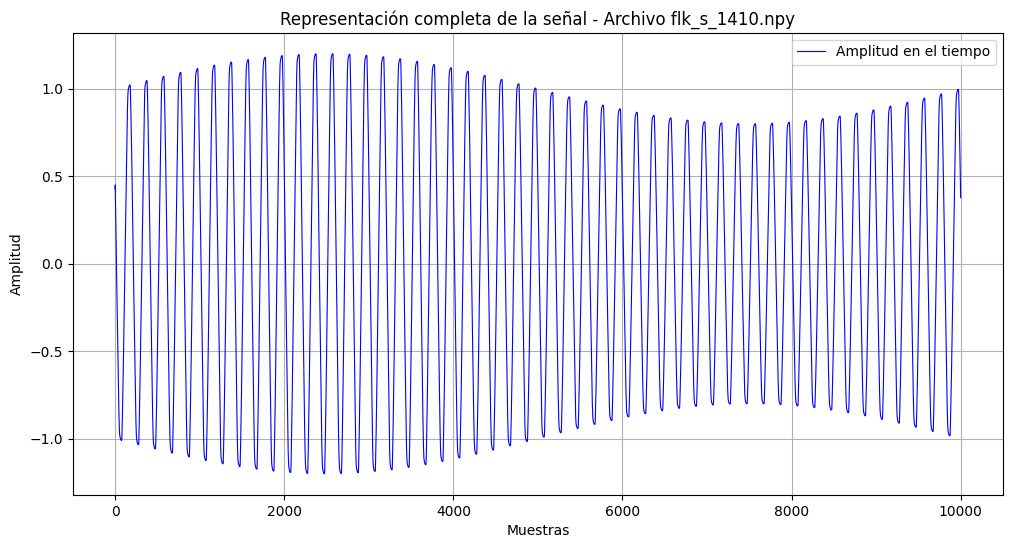

In [3]:
# Generar un número aleatorio entre 1 y 3600 para seleccionar el archivo
import random

archivo_numero = random.randint(1, 2000)
archivo_path = os.path.join(os.getcwd(), 'flicker_signals', 'train' , f'flk_s_{archivo_numero}.npy')

# Cargar el archivo completo
signal_data = np.load(archivo_path)

# Graficar todos los datos de la señal
plt.figure(figsize=(12, 6))
plt.plot(signal_data, color='b', linestyle='-', linewidth=0.8, label='Amplitud en el tiempo')
plt.title(f"Representación completa de la señal - Archivo flk_s_{archivo_numero}.npy")
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.show()